# Logistic Regression
## Cost Function

Training set: $\{(x^{(1)},y^{(1)}), x^{(2)},y^{(2)}), ..., x^{(m)},y^{(m)})\}$

m examples $x \in \begin{bmatrix}
x_0\\ 
x_1\\ 
...\\
x_n
\end{bmatrix}$ $x_0 = 1, y\in\{0,1\}$

$h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$

### Non-Convex Cost Function

If we use the sum of the squared errors ⇒ the cost function would be non-convex

- no guarantee that it will converge to the global minimum

### Logistic Regression Cost Function

$J(θ)=\frac{1}{m}\sum_{i=1}^mCost(h_\theta(x(i)),y(i))$

$Cost(h_\theta(x),y)=−\log(h_\theta(x))$ if y = 1

$Cost(h_\theta(x),y)=−\log(1−h_\theta(x))$

$Cost = 0$  if $y = 1$, $h_\theta(x) = 1$

But as $h_\theta(x) \rightarrow 0$

$Cost \rightarrow \infty$

Penalize learning algorithm by a large cost

### Logistic Regression Cost Function

Since $y = 0$ or $1$ always

$\textrm{Cost}(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))$

$J(\theta) = -\frac{1}{m}[\sum^m_{i=1}y^{(i)}\log h_\theta(x^{(i)}) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]$

**Partial** **Derivative**

$\sum^m_{i=1}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$

> Look EXACTLY identical to linear regression!

what is different here is the ***hypothesis function***

**Vectorized Implementation**

$\theta := \theta - \frac{\alpha}{m} X^T(g(X\theta)-\vec{y}$

In [8]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# https://archive.ics.uci.edu/ml/datasets/banknote+authentication

'''
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)
'''

dataset = pd.read_csv('data/data_banknote_authentication.txt', header=None)
dataset.iloc[:5,:]

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [30]:
# get input and output 
x = np.array(dataset.iloc[:,:4])
y = np.array(dataset.iloc[:,4])

print(x)
print(y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0 0 0 ... 1 1 1]


[]

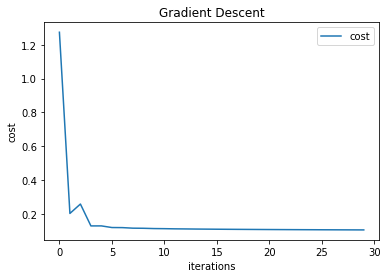

In [51]:
# logistic (sigmoid) function
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

# hypothesis function using the sigmoid function
def hypothesis_function(x, theta):
    return sigmoid_function(np.matmul(theta.T, x))

# cost function
def cost_function(x, y, theta):
    sum_cost = 0
    m = x.shape[0]
    for i in range(m):
        single_cost = -1 * y[i] * np.log(hypothesis_function(x[i], theta)) - (1 - y[i]) * np.log(1 - hypothesis_function(x[i], theta))
        sum_cost += single_cost
    return sum_cost / m

# partial derivative of theta (same as linear regression)
def partial_derivative(x, y, theta, x_terms):
    sum_d = 0
    m = x.shape[0]
    # sum of the difference * the matching feature x_term / m
    for i in range(m):
        sum_d += (hypothesis_function(x[i], theta) - y[i]) * x_terms[i]
    return sum_d / m

# gradient descent
def gradient_descent(x, y, theta, alpha):
    new_theta = np.zeros(theta.shape[0])
    # for each theta calculate the partial derivative
    for j in range(theta.shape[0]):
        # use x[:,j] to get the corresponding feature column
        step = alpha * partial_derivative(x, y, theta, x[:,j])
        new_theta[j] = theta[j] - step
    return new_theta

# learning rate
a = 1
iterations = 30

# parameters
theta = np.zeros(x.shape[1])

# costs
costs = np.zeros(iterations)

# gradient descent
for i in range(iterations):
    theta = gradient_descent(x, y, theta, a)
    costs[i] = cost_function(x, y, theta)

fig, ax = plt.subplots()
ax.plot(costs, label='cost')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title("Gradient Descent")
ax.legend()
ax.plot()

## Optimization Algorithms

- Gradient Descents

### Other

- Conjugate Gradient
- BFGS
- L-BFGS

**Advantages**

- No need to manually pick $\alpha$
- Often faster than gradient descent

**Disadvantages**

- More complex